## Lab 7:  Timeseries processing using StatsModels /  Procesarea seriilor de timp folosnd StatsModels
#### Objective:  getting familiar with smoothing and forecasting methods / familiarizare cu metode de netezire si predictie

#### Source:  https://www.statsmodels.org/stable/examples/notebooks/generated/autoregressions.html#Forecasting

In [13]:
!pip install pandas_datareader

Defaulting to user installation because normal site-packages is not writeable


In [14]:
%matplotlib inline
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import acf, pacf, graphics

In [15]:
# Pregatire vizualizare / Preparing visualization
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc('figure',figsize=(16, 6))

### Example 1: Growth rate housing - AR model

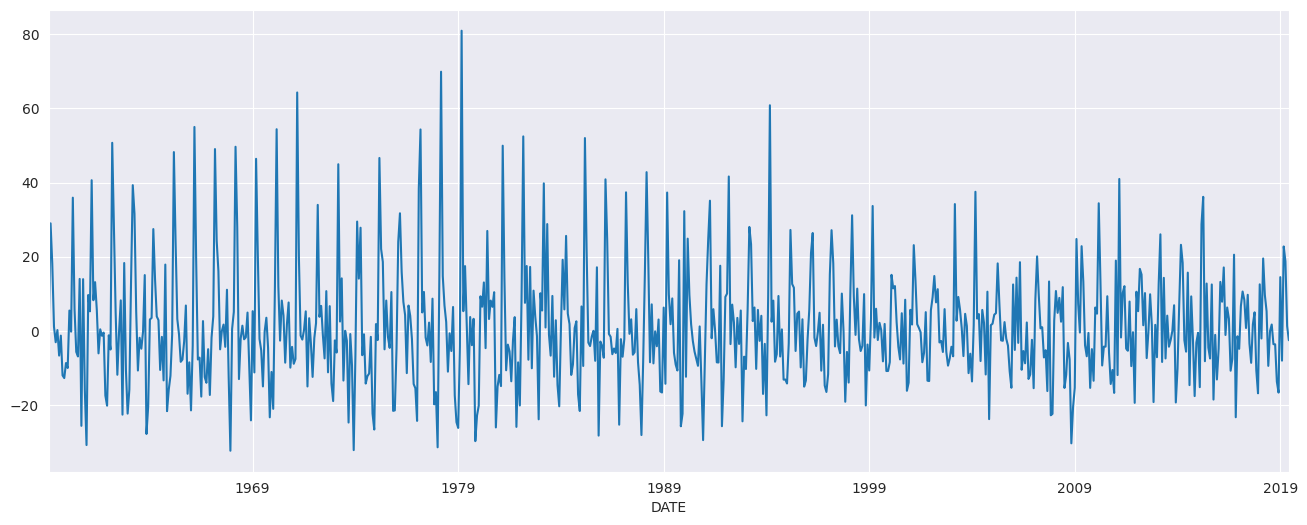

In [16]:
# Dataset: month-over-month growth rate in U.S. Housing starts that has not been seasonally adjusted
data = pdr.get_data_fred('HOUSTNSA', '1959-01-01', '2019-06-01')
housing = data.HOUSTNSA.pct_change().dropna()
# Scale by 100 to get percentages
housing = 100 * housing.asfreq('MS')
fig, ax = plt.subplots()
ax = housing.plot(ax=ax)

In [17]:
print(housing)

DATE
1959-02-01     2.910603
1959-03-01    28.989899
1959-04-01    18.089272
1959-05-01     1.127321
1959-06-01    -3.081967
                ...    
2019-02-01    -8.045977
2019-03-01    22.750000
2019-04-01    18.737271
2019-05-01     1.286449
2019-06-01    -2.540220
Freq: MS, Name: HOUSTNSA, Length: 725, dtype: float64


#### Question 1:  
 * What can be said about the series with respect the stationarity and the seasonal character? / Ce se poate spune despre serie in raport cu proprietatea de stationaritate respectiv caracterul sezonier?

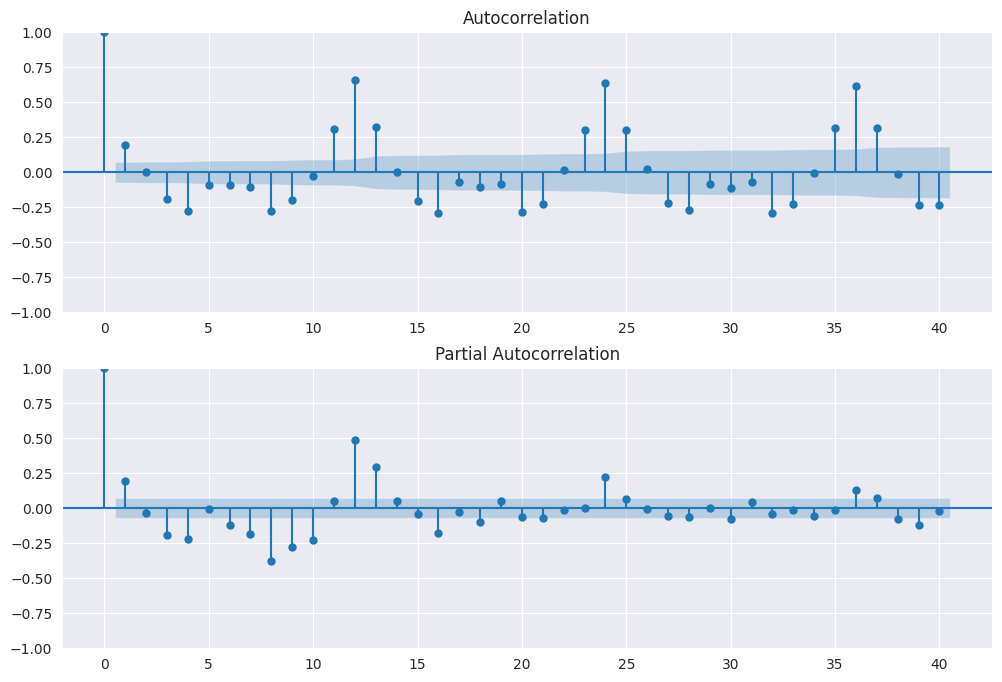

In [18]:
# Analysis of the autocorrelations / Functii de autocorelatie
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(housing.values.squeeze(), lags=40, ax=ax1) # autocorrelation function
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(housing, lags=40, ax=ax2) # partial autocorrelation function

In [19]:
# Model de tip AR (p = 2) / AR model (p = 2)
mod = AutoReg(housing, 2, old_names=False) 
res = mod.fit()  
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:                     AutoReg(2)   Log Likelihood               -3011.257
Method:               Conditional MLE   S.D. of innovations             15.580
Date:                Thu, 30 May 2024   AIC                           6030.514
Time:                        16:34:26   BIC                           6048.848
Sample:                    04-01-1959   HQIC                          6037.591
                         - 06-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.9490      0.582      1.630      0.103      -0.192       2.090
HOUSTNSA.L1     0.1992      0.037      5.371      0.000       0.127       0.272
HOUSTNSA.L2    -0.0331      0.037     -0.894    

In [20]:
# Model de tip AR (p = 3) / AR model (p = 3)
mod = AutoReg(housing, 3, old_names=False) 
res = mod.fit()  
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:                     AutoReg(3)   Log Likelihood               -2993.442
Method:               Conditional MLE   S.D. of innovations             15.289
Date:                Thu, 30 May 2024   AIC                           5996.884
Time:                        16:34:26   BIC                           6019.794
Sample:                    05-01-1959   HQIC                          6005.727
                         - 06-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1228      0.573      1.961      0.050       0.000       2.245
HOUSTNSA.L1     0.1910      0.036      5.235      0.000       0.120       0.263
HOUSTNSA.L2     0.0058      0.037      0.155    

In [52]:
p_min = 0
aic_min = 1e10

for p in range (2, 51):
    mod = AutoReg(housing, p, old_names=False)
    res = mod.fit()
    print(f'p = {p}, aic = {res.aic}')
    if res.aic < aic_min:
        p_min, aic_min = p, res.aic

print(f'Minimal aic for: p = {p_min}, aic = {aic_min}')

p = 2, aic = 6030.514353427225
p = 3, aic = 5996.883609079859
p = 4, aic = 5955.21048060838
p = 5, aic = 5949.961864683626
p = 6, aic = 5933.949472672437
p = 7, aic = 5902.999640585859
p = 8, aic = 5785.486906090429
p = 9, aic = 5721.348961041713
p = 10, aic = 5674.980370539259
p = 11, aic = 5668.404653482708
p = 12, aic = 5462.862445426725
p = 13, aic = 5382.314183141356
p = 14, aic = 5368.389758113778
p = 15, aic = 5362.528543309762
p = 16, aic = 5335.883831645047
p = 17, aic = 5330.333182916145
p = 18, aic = 5317.246490988443
p = 19, aic = 5308.675971906628
p = 20, aic = 5296.805234415448
p = 21, aic = 5285.951103069742
p = 22, aic = 5281.162262360598
p = 23, aic = 5273.2747063692095
p = 24, aic = 5229.039705978239
p = 25, aic = 5218.696427583743
p = 26, aic = 5206.063477942303
p = 27, aic = 5198.798886846916
p = 28, aic = 5190.135595929389
p = 29, aic = 5184.756709209592
p = 30, aic = 5174.417370687677
p = 31, aic = 5169.350810421928
p = 32, aic = 5162.776472377778
p = 33, aic = 51

In [21]:
# Automatic selection of the order (a model is better if AIC and BIC are smaller) 
# Selectie automata a ordinului (criterii de selectie: AIC, BIC - valori cat mai mici)
sel = ar_select_order(housing, 20, old_names=False)
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:                    AutoReg(16)   Log Likelihood               -2649.942
Method:               Conditional MLE   S.D. of innovations             10.162
Date:                Thu, 30 May 2024   AIC                           5335.884
Time:                        16:34:26   BIC                           5418.033
Sample:                    06-01-1960   HQIC                          5367.621
                         - 06-01-2019                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.5156      0.458      3.310      0.001       0.618       2.413
HOUSTNSA.L1     -0.3156      0.037     -8.536      0.000      -0.388      -0.243
HOUSTNSA.L2     -0.1048      0.039     -2.70

In [22]:
print(sel)

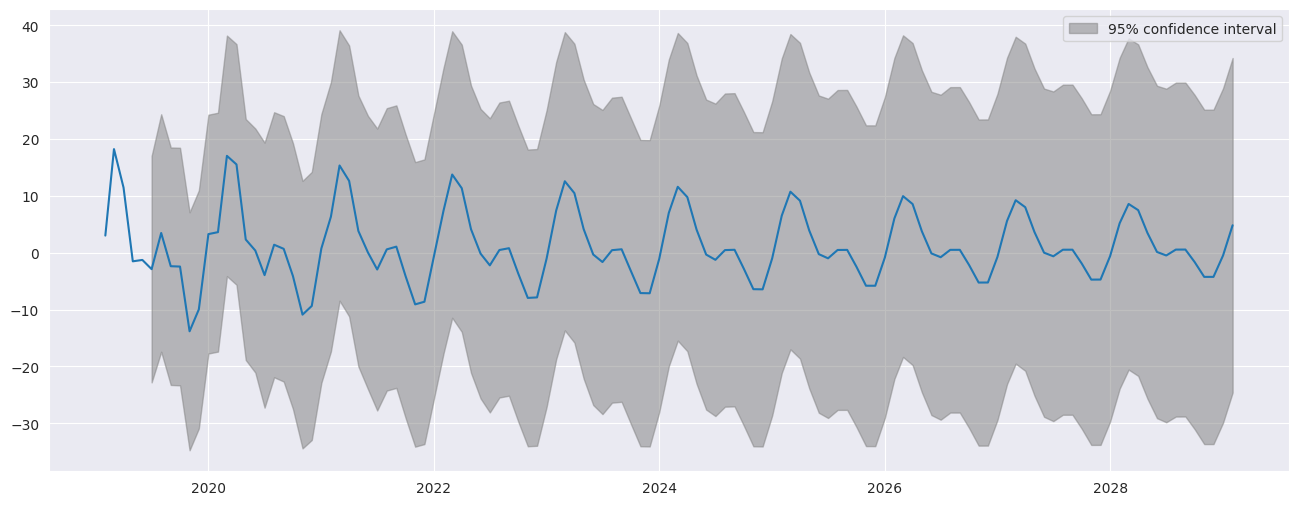

In [23]:
# AR model plot - forecast for the next 10 years / predictie pentru urmatorii 10 ani
fig = res.plot_predict(720, 840)

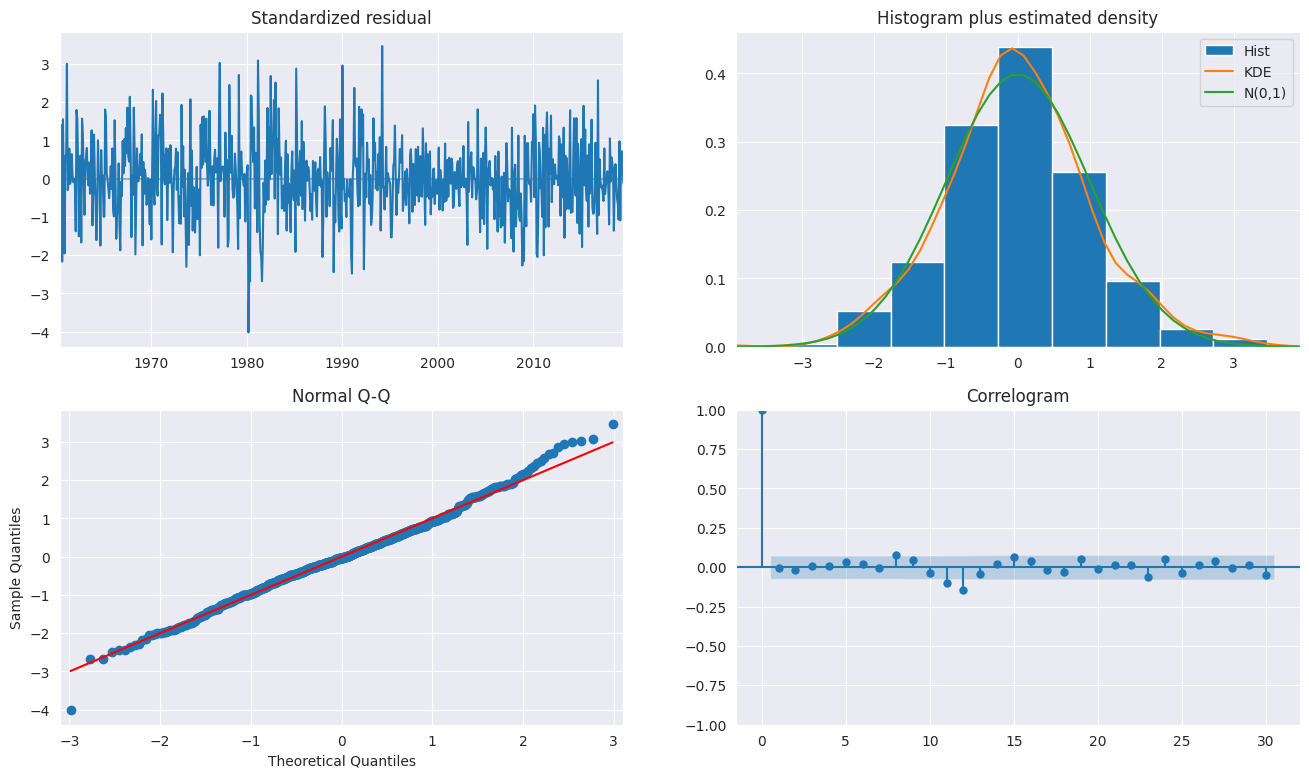

In [24]:
# Analysis of the model:  the residuals shouldn't be correlated and should have a normal distribution
# Analiza modelului: reziduurile trebuie sa fie necorelate si sa aiba distributie normala
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

In [25]:
# Including seasonal elements / includerea componentei sezoniere
sel = ar_select_order(housing, 20, seasonal=True, old_names=False)
print(sel.ar_lags)
res = sel.model.fit()
print(res.summary())

[1, 2]
                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:               Seas. AutoReg(2)   Log Likelihood               -2652.556
Method:               Conditional MLE   S.D. of innovations              9.487
Date:                Thu, 30 May 2024   AIC                           5335.112
Time:                        16:34:29   BIC                           5403.863
Sample:                    04-01-1959   HQIC                          5361.648
                         - 06-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.2726      1.373      0.927      0.354      -1.418       3.963
s(2,12)        32.6477      1.824     17.901      0.000      29.073      36.222
s(3,12)        23.0685      2.435      9.

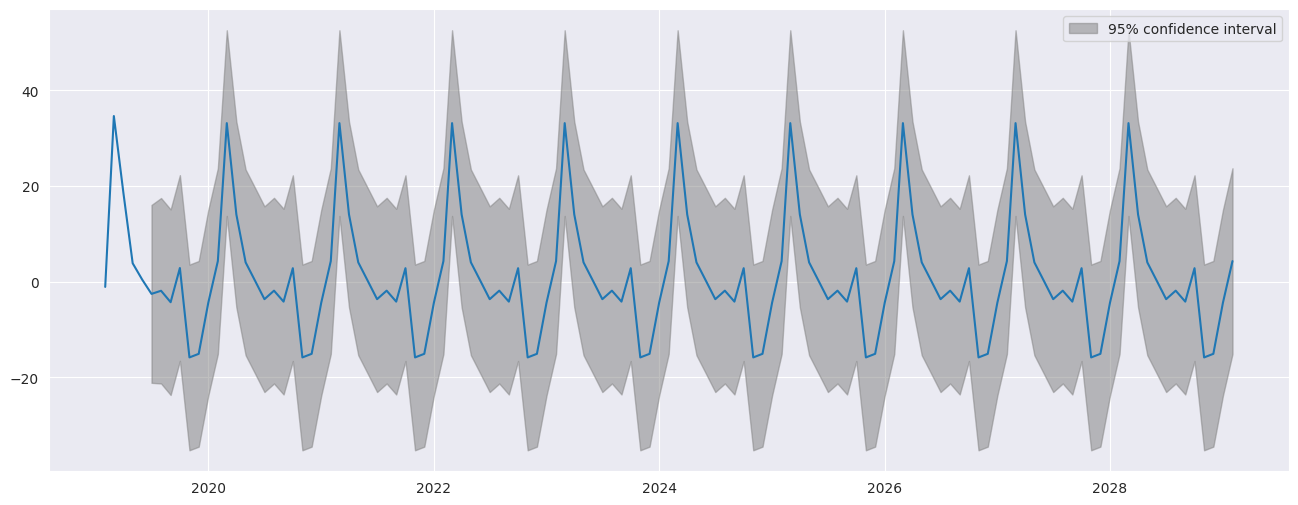

In [26]:
fig = res.plot_predict(720, 840)

### Example 2:  Sunspots dataset - ARIMA model

In [27]:
dta = sm.datasets.sunspots.load_pandas().data

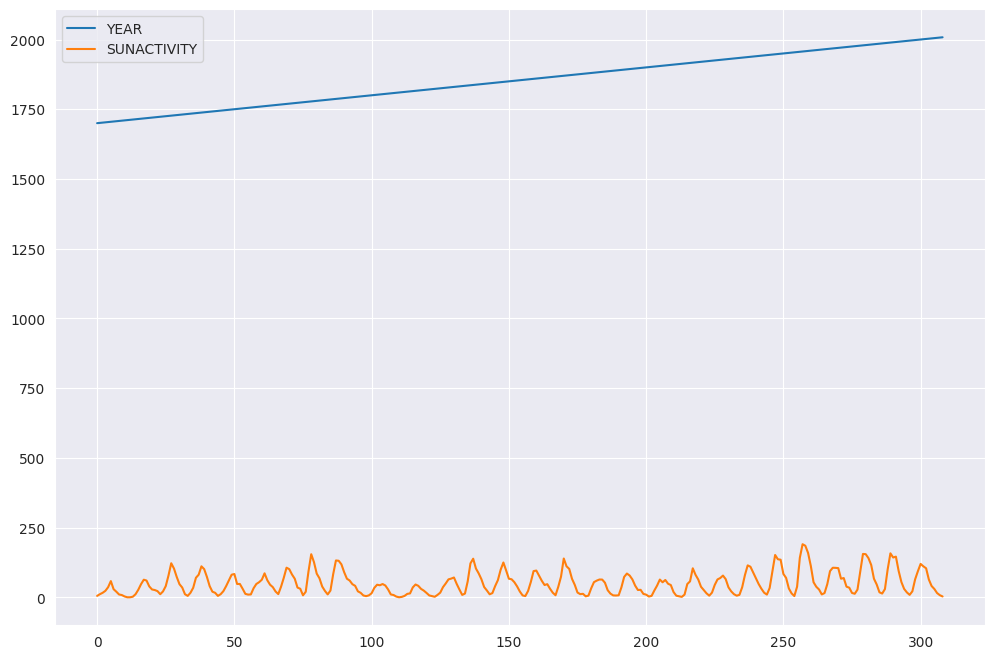

In [28]:
dta.plot(figsize=(12,8));

In [29]:
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]

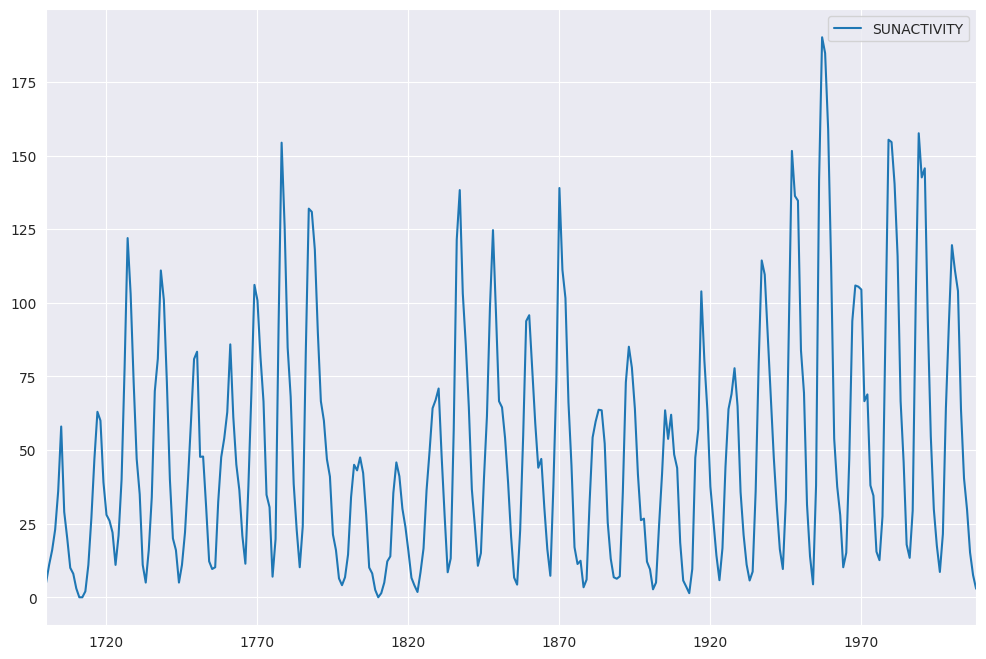

In [30]:
dta.plot(figsize=(12,8));

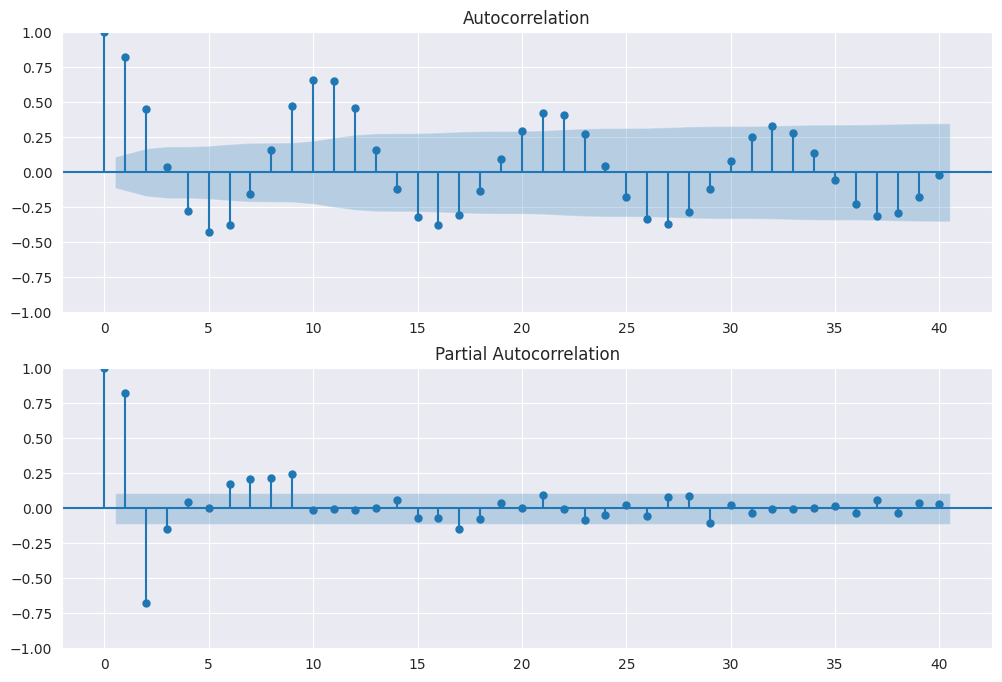

In [31]:
# Analysis of the autocorrelations / Functii de autocorelatie
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1) # autocorrelation function
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2) # partial autocorrelation function

In [33]:
arma_mod200 = ARIMA(dta, order=(2, 0, 0)).fit()
print(arma_mod200.params)

const      49.746198
ar.L1       1.390633
ar.L2      -0.688573
sigma2    274.727181
dtype: float64


/home/mihai/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
/home/mihai/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
/home/mihai/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)


In [34]:
print(arma_mod200.aic, arma_mod200.bic)

2622.6370933008184 2637.570458408409


In [35]:
arma_mod300 = ARIMA(dta, order=(3, 0, 0)).fit()
print(arma_mod300.params)

/home/mihai/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
/home/mihai/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
/home/mihai/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)


const      49.751912
ar.L1       1.300818
ar.L2      -0.508102
ar.L3      -0.129644
sigma2    270.101140
dtype: float64


In [36]:
print(arma_mod300.aic, arma_mod300.bic)

2619.4036292456663 2638.070335630155


#### Exercise 1:  compute the AIC values for the following models:
 * ARIMA(3,0,1)
 * ARIMA(3,0,2)
 * ARIMA(3,1,2)

In [50]:
arma_mod301 = ARIMA(dta, order=(3, 0, 1)).fit()
print('ARMA(3, 0, 1) parameters:')
print(arma_mod301.params)
print(f'arma_mod301.aic = {arma_mod301.aic}, arma_mod301.bic = {arma_mod301.bic}')

ARMA(3, 0, 1) parameters:
const      49.750348
ar.L1       0.857811
ar.L2       0.107759
ar.L3      -0.434410
ma.L1       0.452924
sigma2    268.988351
dtype: float64
arma_mod301.aic = 2620.122160555992, arma_mod301.bic = 2642.5222082173786


/home/mihai/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
/home/mihai/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
/home/mihai/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)


In [54]:
min_p = 0
min_q = 0
min_aic = 1e10

for p in range(2, 11):
    for q in range(2, 11):
        arima_model = ARIMA(dta, order = (p, 1, q)).fit()
        # print(f'p = {p}, q = {q}, aic = {arima_model.aic}')
        if arima_model.aic < min_aic:
            min_p, min_q, min_aic = p, q, arima_model.aic

print(f'Minimal values for: p = {min_p}, q = {min_q}, aic = {min_aic}')

/home/mihai/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
/home/mihai/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
/home/mihai/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
/home/mihai/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/mihai/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency in

Minimal values for: p = 6, q = 6, aic = 2556.272854040546


In [48]:
arma_mod302 = ARIMA(dta, order=(3, 0, 2)).fit()
print('ARMA(3, 0, 2) parameters:')
print(arma_mod302.params)
print(f'arma_mod302.aic = {arma_mod302.aic}, arma_mod302.bic = {arma_mod302.bic}')

/home/mihai/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
/home/mihai/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
/home/mihai/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)


ARMA(3, 0, 2) parameters:
const      49.749671
ar.L1       0.854736
ar.L2       0.113659
ar.L3      -0.437964
ma.L1       0.455476
ma.L2      -0.002724
sigma2    269.152910
dtype: float64
arma_mod302.aic = 2622.12133000741, arma_mod302.bic = 2648.254718945694


In [49]:
arma_mod312 = ARIMA(dta, order=(3, 1, 2)).fit()
print('ARMA(3, 1, 2) parameters:')
print(arma_mod312.params)
print(f'arma_mod312.aic = {arma_mod312.aic}, arma_mod312.bic = {arma_mod312.bic}')

/home/mihai/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
/home/mihai/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
/home/mihai/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
/home/mihai/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/mihai/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarn

ARMA(3, 1, 2) parameters:
ar.L1       1.800575
ar.L2      -1.236863
ar.L3       0.176364
ma.L1      -1.626711
ma.L2       0.745030
sigma2    237.154298
dtype: float64
arma_mod312.aic = 2573.2346593114753, arma_mod312.bic = 2595.6152580093167


### Example 3:  Exponential smoothing, decomposition-based models https://www.statsmodels.org/stable/examples/notebooks/generated/exponential_smoothing.html

In [37]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [38]:
# data
data = [446.6565,  454.4733,  455.663 ,  423.6322,  456.2713,  440.5881, 425.3325,  485.1494,  506.0482,  526.792 ,  514.2689,  494.211 ]
index= pd.date_range(start='1996', end='2008', freq='A')
oildata = pd.Series(data, index)

data = [17.5534,  21.86  ,  23.8866,  26.9293,  26.8885,  28.8314, 30.0751,  30.9535,  30.1857,  31.5797,  32.5776,  33.4774, 39.0216,  41.3864,  41.5966]
index= pd.date_range(start='1990', end='2005', freq='A')
air = pd.Series(data, index)

data = [263.9177,  268.3072,  260.6626,  266.6394,  277.5158,  283.834 , 290.309 ,  292.4742,  300.8307,  309.2867,  318.3311,  329.3724, 338.884 ,  339.2441,  328.6006,  314.2554,  314.4597,  321.4138, 329.7893,  346.3852,  352.2979,  348.3705,  417.5629,  417.1236, 417.7495,  412.2339,  411.9468,  394.6971,  401.4993,  408.2705, 414.2428]
index= pd.date_range(start='1970', end='2001', freq='A')
livestock2 = pd.Series(data, index)

data = [407.9979 ,  403.4608,  413.8249,  428.105 ,  445.3387,  452.9942, 455.7402]
index= pd.date_range(start='2001', end='2008', freq='A')
livestock3 = pd.Series(data, index)

data = [41.7275,  24.0418,  32.3281,  37.3287,  46.2132,  29.3463, 36.4829,  42.9777,  48.9015,  31.1802,  37.7179,  40.4202, 51.2069,  31.8872,  40.9783,  43.7725,  55.5586,  33.8509, 42.0764,  45.6423,  59.7668,  35.1919,  44.3197,  47.9137]
index= pd.date_range(start='2005', end='2010-Q4', freq='QS-OCT')
aust = pd.Series(data, index)

/tmp/ipykernel_1369/397063864.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  index= pd.date_range(start='1996', end='2008', freq='A')
/tmp/ipykernel_1369/397063864.py:7: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  index= pd.date_range(start='1990', end='2005', freq='A')
/tmp/ipykernel_1369/397063864.py:11: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  index= pd.date_range(start='1970', end='2001', freq='A')
/tmp/ipykernel_1369/397063864.py:15: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  index= pd.date_range(start='2001', end='2008', freq='A')


Figure 7.1: Oil production in Saudi Arabia from 1996 to 2007.


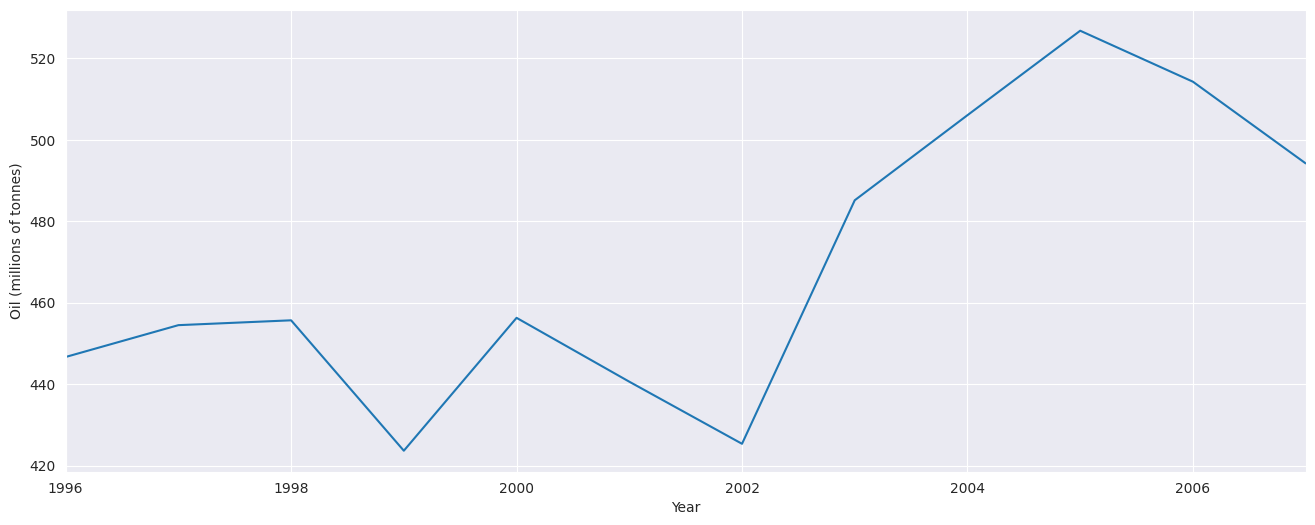

In [39]:
# Smoothing of oil data
ax=oildata.plot()
ax.set_xlabel("Year")
ax.set_ylabel("Oil (millions of tonnes)")
print("Figure 7.1: Oil production in Saudi Arabia from 1996 to 2007.")

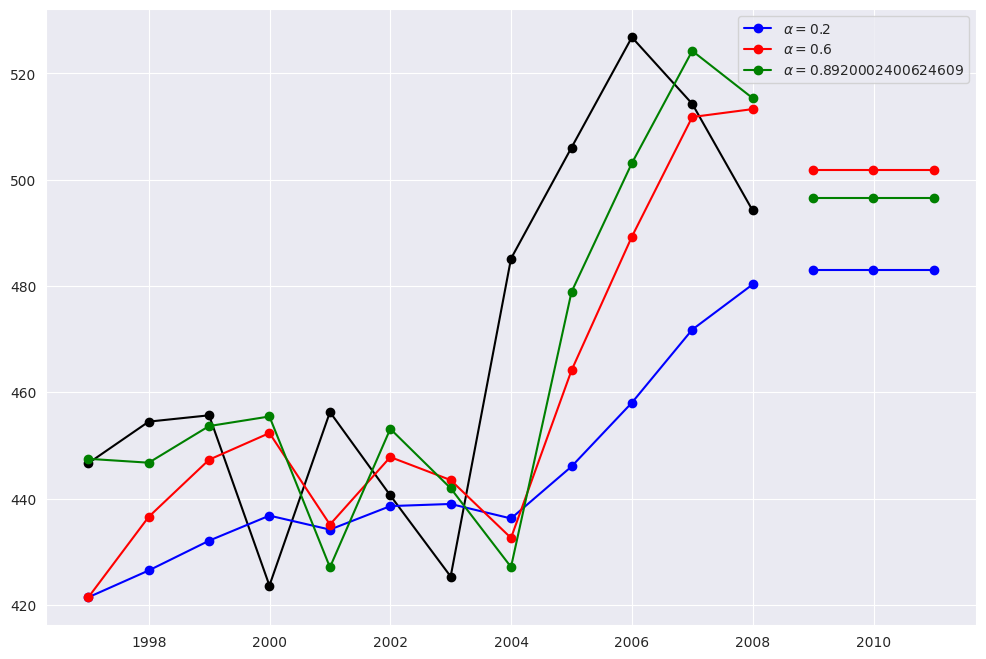

In [40]:
# Influence of the smoothing coefficient (no trend, no seasonality, forecast for 3 future moments) 
# / Influenta coeficientului de netezire (fara treend, fara caracter sezonier, prognoza pt 3 momente viitoare)
fit1 = SimpleExpSmoothing(oildata, initialization_method="heuristic").fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(3).rename(r'$\alpha=0.2$')
fit2 = SimpleExpSmoothing(oildata, initialization_method="heuristic").fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(3).rename(r'$\alpha=0.6$')
fit3 = SimpleExpSmoothing(oildata, initialization_method="estimated").fit()
fcast3 = fit3.forecast(3).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

plt.figure(figsize=(12, 8))
plt.plot(oildata, marker='o', color='black')
plt.plot(fit1.fittedvalues, marker='o', color='blue')
line1, = plt.plot(fcast1, marker='o', color='blue')
plt.plot(fit2.fittedvalues, marker='o', color='red')
line2, = plt.plot(fcast2, marker='o', color='red')
plt.plot(fit3.fittedvalues, marker='o', color='green')
line3, = plt.plot(fcast3, marker='o', color='green')
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

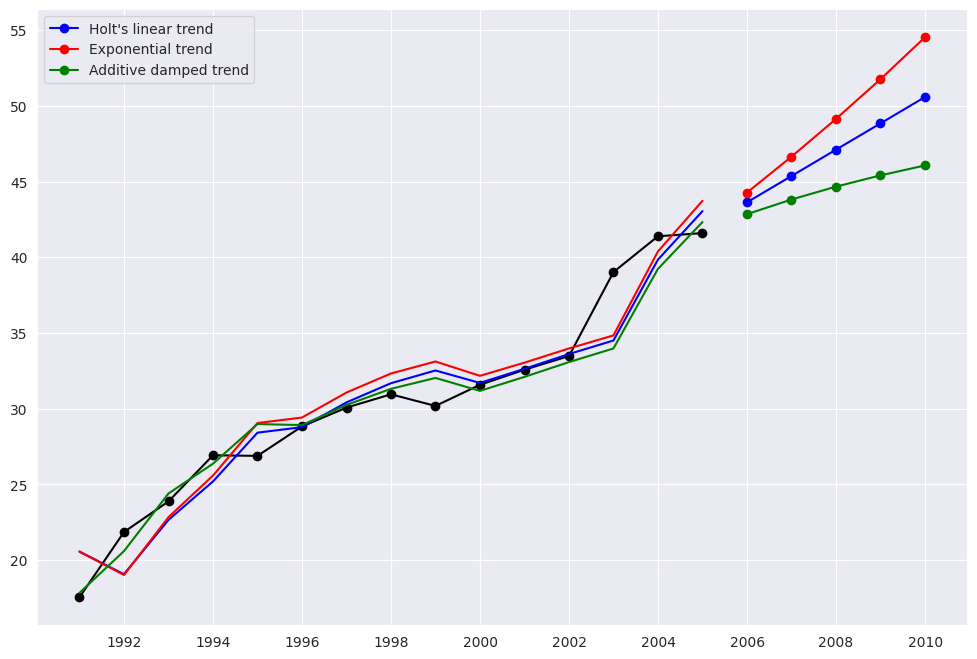

In [41]:
# Forecasting using the Holt-Winters methods (with trend, no seasonality) - forecasting 5 future values  
# / Predictie cu metoda Holt Winters (modelare tendinta, fara caracter sezonier) - prognoza 5 valori

fit1 = Holt(air, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
fcast1 = fit1.forecast(5).rename("Holt's linear trend")
fit2 = Holt(air, exponential=True, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
fcast2 = fit2.forecast(5).rename("Exponential trend")
fit3 = Holt(air, damped_trend=True, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2)
fcast3 = fit3.forecast(5).rename("Additive damped trend")

plt.figure(figsize=(12, 8))
plt.plot(air, marker='o', color='black')
plt.plot(fit1.fittedvalues, color='blue')
line1, = plt.plot(fcast1, marker='o', color='blue')
plt.plot(fit2.fittedvalues, color='red')
line2, = plt.plot(fcast2, marker='o', color='red')
plt.plot(fit3.fittedvalues, color='green')
line3, = plt.plot(fcast3, marker='o', color='green')
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

In [42]:
# Comparisons/ Comparatii intre modele

fit1 = SimpleExpSmoothing(livestock2, initialization_method="estimated").fit()
fit2 = Holt(livestock2, initialization_method="estimated").fit()
fit3 = Holt(livestock2,exponential=True, initialization_method="estimated").fit()
fit4 = Holt(livestock2,damped_trend=True, initialization_method="estimated").fit(damping_trend=0.98)
fit5 = Holt(livestock2,exponential=True, damped_trend=True, initialization_method="estimated").fit()
params = ['smoothing_level', 'smoothing_trend', 'damping_trend', 'initial_level', 'initial_trend']
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$l_0$","$b_0$","SSE"] ,columns=['SES', "Holt's","Exponential", "Additive", "Multiplicative"])
results["SES"] =            [fit1.params[p] for p in params] + [fit1.sse]
results["Holt's"] =         [fit2.params[p] for p in params] + [fit2.sse]
results["Exponential"] =    [fit3.params[p] for p in params] + [fit3.sse]
results["Additive"] =       [fit4.params[p] for p in params] + [fit4.sse]
results["Multiplicative"] = [fit5.params[p] for p in params] + [fit5.sse]
results

,SES,Holt's,Exponential,Additive,Multiplicative
$\alpha$,1.000000,0.974338,0.977642,0.978843,0.974912
$\beta$,NaN,0.000000,0.000000,0.000008,0.000000
$\phi$,NaN,NaN,NaN,0.980000,0.981646
$l_0$,263.917703,258.882683,260.335599,257.357716,258.951817
$b_0$,NaN,5.010856,1.013780,6.645297,1.038144
SSE,6761.350235,6004.138207,6104.194782,6036.597169,6081.995045


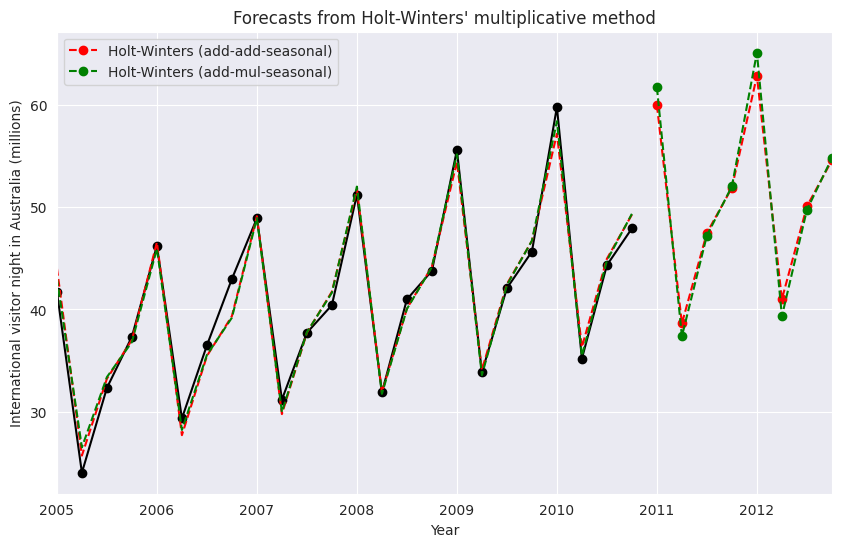

Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality.


,Additive,Multiplicative,Additive Dam,Multiplica Dam
$\alpha$,1.490116e-08,1.490116e-08,1.490116e-08,1.490116e-08
$\beta$,1.409859e-08,1.835443e-24,6.490718e-09,5.042324e-09
$\phi$,NaN,NaN,9.430416e-01,9.536044e-01
$\gamma$,1.002956e-15,7.282102e-16,0.000000e+00,0.000000e+00
$l_0$,1.119348e+01,1.106380e+01,1.084022e+01,9.899295e+00
$b_0$,1.205396e-01,1.198961e-01,2.456750e-01,1.975446e-01
SSE,4.402746e+01,3.611262e+01,3.527620e+01,3.062033e+01


In [43]:
# Seasonal component / Modelarea componentei sezoniere
fit1 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='add', use_boxcox=True, initialization_method="estimated").fit()
fit2 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='mul', use_boxcox=True, initialization_method="estimated").fit()
fit3 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='add', damped_trend=True, use_boxcox=True, initialization_method="estimated").fit()
fit4 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='mul', damped_trend=True, use_boxcox=True, initialization_method="estimated").fit()
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$\gamma$",r"$l_0$","$b_0$","SSE"])
params = ['smoothing_level', 'smoothing_trend', 'damping_trend', 'smoothing_seasonal', 'initial_level', 'initial_trend']
results["Additive"]       = [fit1.params[p] for p in params] + [fit1.sse]
results["Multiplicative"] = [fit2.params[p] for p in params] + [fit2.sse]
results["Additive Dam"]   = [fit3.params[p] for p in params] + [fit3.sse]
results["Multiplica Dam"] = [fit4.params[p] for p in params] + [fit4.sse]

ax = aust.plot(figsize=(10,6), marker='o', color='black', title="Forecasts from Holt-Winters' multiplicative method" )
ax.set_ylabel("International visitor night in Australia (millions)")
ax.set_xlabel("Year")
fit1.fittedvalues.plot(ax=ax, style='--', color='red')
fit2.fittedvalues.plot(ax=ax, style='--', color='green')

fit1.forecast(8).rename('Holt-Winters (add-add-seasonal)').plot(ax=ax, style='--', marker='o', color='red', legend=True)
fit2.forecast(8).rename('Holt-Winters (add-mul-seasonal)').plot(ax=ax, style='--', marker='o', color='green', legend=True)

plt.show()
print("Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality.")

results

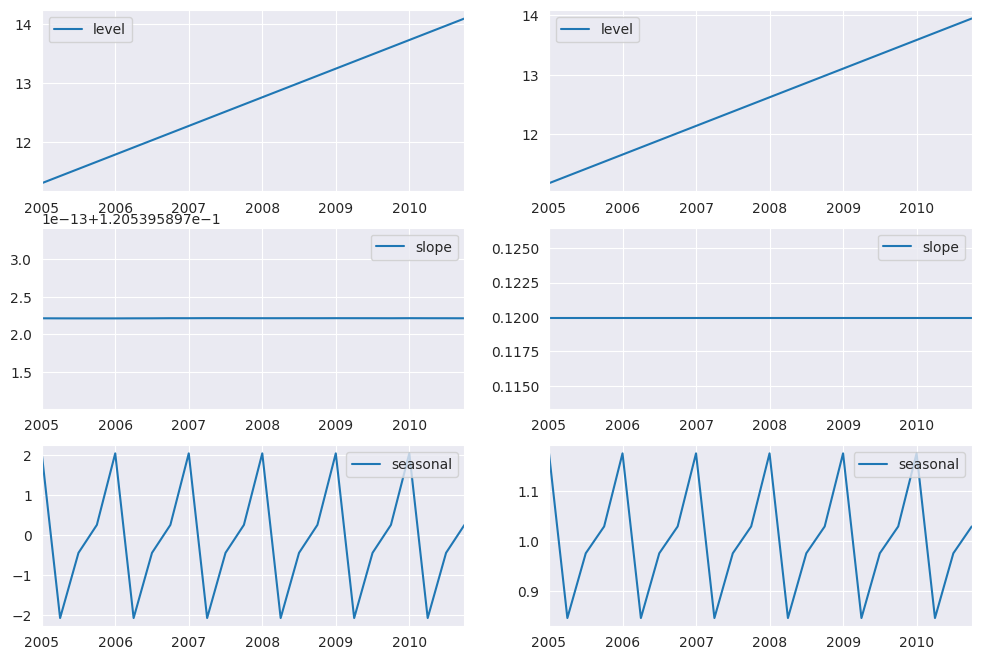

In [44]:
# Components (level, slope, seasonal) / Vizualizarea componentelor (nivel, panta, componenta sezoniera)
states1 = pd.DataFrame(np.c_[fit1.level, fit1.trend, fit1.season], columns=['level','slope','seasonal'], index=aust.index)
states2 = pd.DataFrame(np.c_[fit2.level, fit2.trend, fit2.season], columns=['level','slope','seasonal'], index=aust.index)
fig, [[ax1, ax4],[ax2, ax5], [ax3, ax6]] = plt.subplots(3, 2, figsize=(12,8))
states1[['level']].plot(ax=ax1)
states1[['slope']].plot(ax=ax2)
states1[['seasonal']].plot(ax=ax3)
states2[['level']].plot(ax=ax4)
states2[['slope']].plot(ax=ax5)
states2[['seasonal']].plot(ax=ax6)
plt.show()

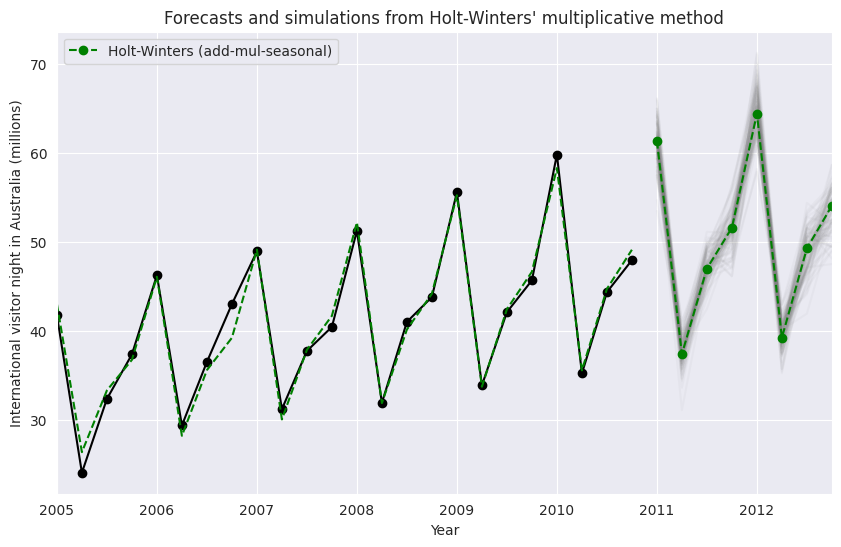

In [45]:
# Uncertainty estimation (confidence intervals) - 100 samples / Estimarea incertitudinii (intervale de incredere)


fit = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='mul', initialization_method="estimated").fit()
simulations = fit.simulate(8, repetitions=100, error='mul')

ax = aust.plot(figsize=(10,6), marker='o', color='black',
               title="Forecasts and simulations from Holt-Winters' multiplicative method" )
ax.set_ylabel("International visitor night in Australia (millions)")
ax.set_xlabel("Year")
fit.fittedvalues.plot(ax=ax, style='--', color='green')
simulations.plot(ax=ax, style='-', alpha=0.05, color='grey', legend=False)
fit.forecast(8).rename('Holt-Winters (add-mul-seasonal)').plot(ax=ax, style='--', marker='o', color='green', legend=True)
plt.show()